In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Excel dosyasını okuma
df = pd.read_excel("arabailanlar_data.xlsx")

# LabelEncoder kullanarak kategorik sütunları sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
df["Seri"] = label_encoder.fit_transform(df["Seri"])
df["Model"] = label_encoder.fit_transform(df["Model"])
df["Vites Tipi"] = label_encoder.fit_transform(df["Vites Tipi"])
df["Yakıt Tipi"] = label_encoder.fit_transform(df["Yakıt Tipi"])
df["Kasa Tipi"] = label_encoder.fit_transform(df["Kasa Tipi"])
df["Renk"] = label_encoder.fit_transform(df["Renk"])

# String olarak tutulan sütunlardaki gereksiz karakterleri temizleme
df["Kilometre"] = df["Kilometre"].str.replace(" km", "")
df["Kilometre"] = df["Kilometre"].replace('\.','', regex=True)
df["Motor Gücü"] = df["Motor Gücü"].str.replace(" hp", "")
df["Motor Gücü"] = df["Motor Gücü"].str.split(" - ").str[0]
df["Fiyat"] = df["Fiyat"].str.replace(" TL", "")
df["Fiyat"] = df["Fiyat"].replace('\.','', regex=True)

df["Kilometre"] = pd.to_numeric(df["Kilometre"], errors='coerce')
df["Motor Gücü"] = pd.to_numeric(df["Motor Gücü"], errors='coerce')
df["Fiyat"] = pd.to_numeric(df["Fiyat"], errors='coerce')

# NaN değerlere sahip satırları düşürme
df = df.dropna(subset=["Fiyat", "Motor Gücü" ,"Kasa Tipi","Renk"])
df = df.dropna(subset=["Fiyat"])
df = df.dropna(subset=["Motor Gücü"])
df = df.dropna(subset=["Kasa Tipi"])
df = df.dropna(subset=["Renk"])

# Gereksiz sütunları düşürme
df = df.drop(columns=["Marka","İlan No", "İlan Tarihi","Model", "Motor Hacmi", "Çekiş", "Ort. Yakıt Tüketimi", "Yakıt Deposu", "Takasa Uygun","Boya-değişen", "Kimden" ,"Motor Gücü (kW)","Batarya Voltajı (V)","Menzil", "Şarj Süresi" , "Pil Kapasitesi (kWh)" ,"Plaka Uyruğu" , "Durumu"], errors="ignore")

# İşlenmiş verileri yeni bir Excel dosyasına kaydetme
df.to_excel("islenmisarabailanlar_data.xlsx", index=False)

# DataFrame'in ilk 5 satırını gösterme
print(df.head())


In [3]:
from sklearn.model_selection import train_test_split

# Excel dosyasından veri setini okuma
dataset = pd.read_excel("islenmisarabailanlar_data.xlsx")

# Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) ayırma
X = dataset.drop("Fiyat", axis=1)
y = dataset["Fiyat"]

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını yazdırma
print('Training set (X_train) size:', X_train.shape)
print('Test set (X_test) size:', X_test.shape)
print('Training set (y_train) size:', y_train.shape)
print('Test set (y_test) size:', y_test.shape)


x_train : (724, 8)
x_test : (182, 8)
y_train : (724,)
y_test : (182,)


mean absolute error:  350308.3499925318
root mean squared error:  503275.63260635576
Coefficient of determination R^2:  0.7393203901761816


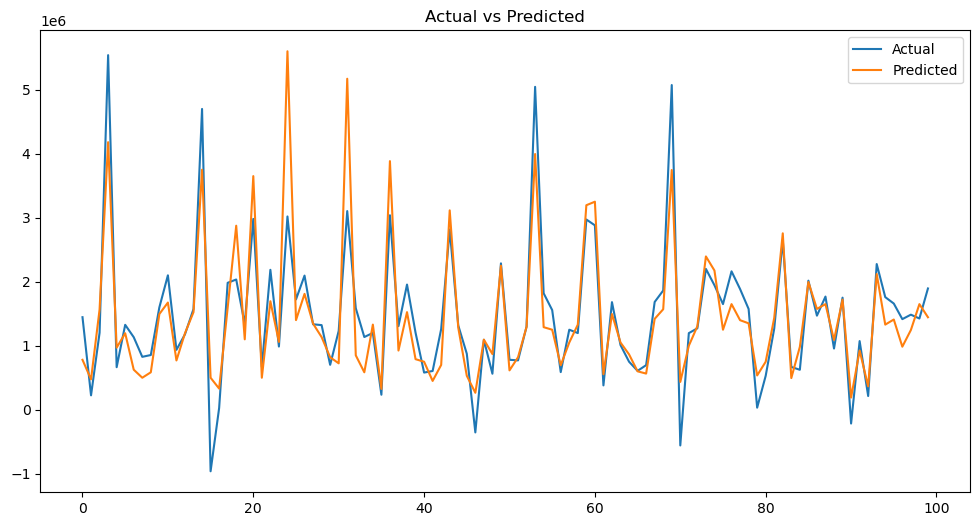

In [4]:
from sklearn.linear_model import LinearRegression, Ridge,ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_pred))
print("root mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_pred))
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  300768.6373626374
root mean squared error:  860827.9131864667
Coefficient of determination R^2:  0.2373453239129314


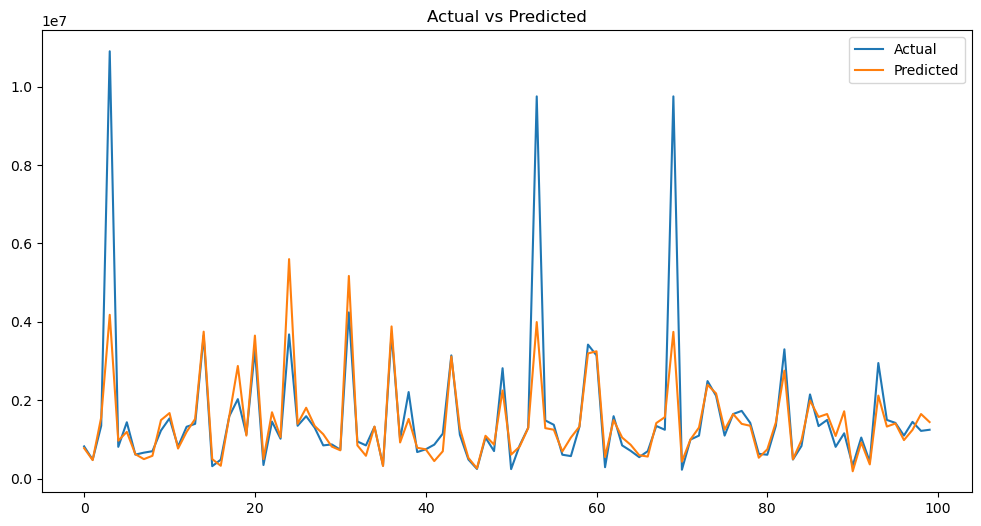

In [5]:
from sklearn.tree import DecisionTreeRegressor

# 2. Decision Trees
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_pred_tree))
print("root mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred_tree)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_pred_tree))
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_pred_tree,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  220810.0667216117
root mean squared error:  660902.6043755931
Coefficient of determination R^2:  0.550458094623602


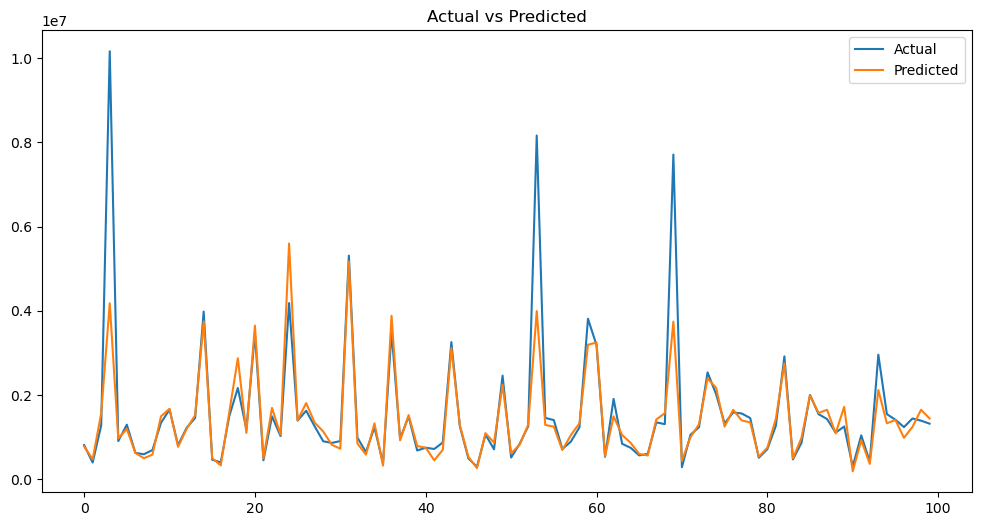

In [6]:
from sklearn.ensemble import RandomForestRegressor

# 3. Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_predict_rf = rf.predict(X_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  479775.45494505495
root mean squared error:  717940.3301436359
Coefficient of determination R^2:  0.46951640715146026


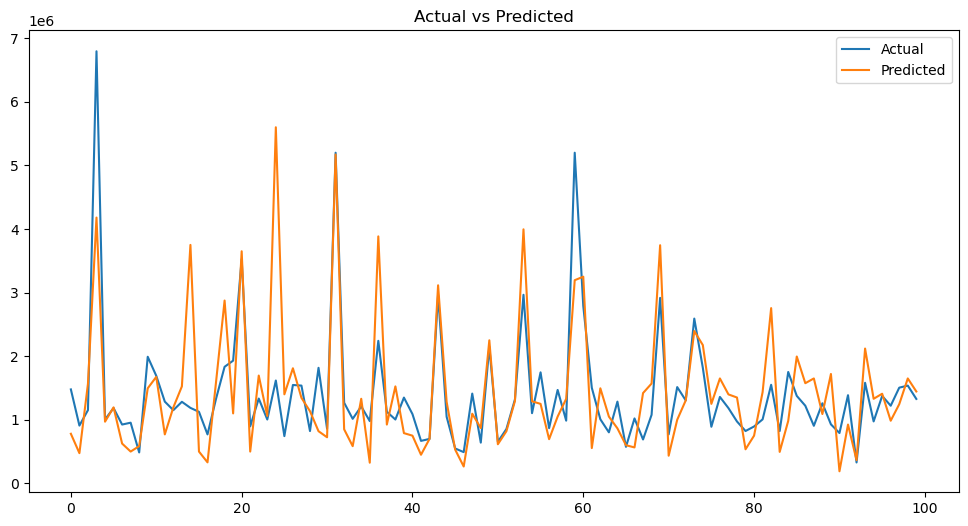

In [7]:
from sklearn.neighbors import KNeighborsRegressor

# 4. K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_pred_knn))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_pred_knn))
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_pred_knn,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  349856.4092645398
root mean squared error:  503030.8115375146
Coefficient of determination R^2:  0.7395739464138198


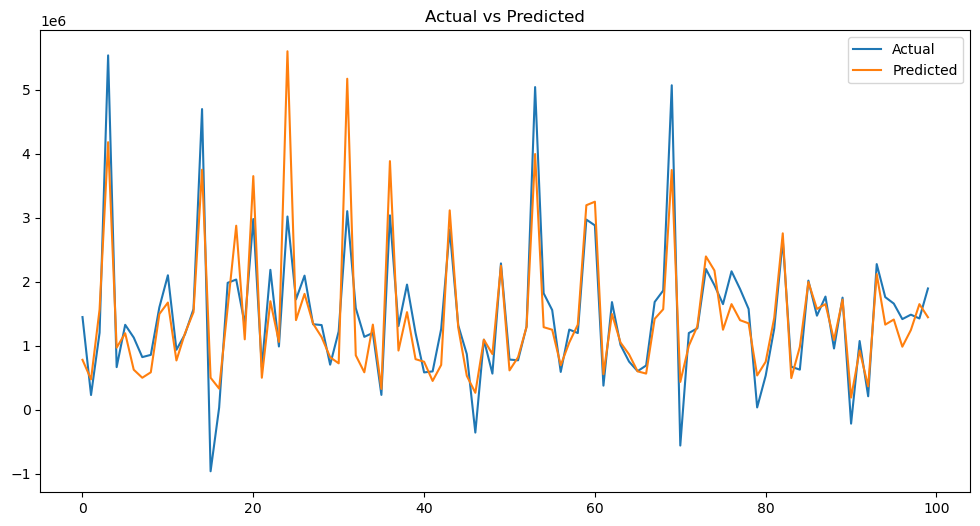

['ridge_model.joblib']

In [8]:
import joblib

# 5. Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_pred_ridge))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_pred_ridge)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_pred_ridge))
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_pred_ridge,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

# Modeli joblib ile dosyaya kaydedin
joblib.dump(ridge_model, 'ridge_model.joblib')

mean absolute error:  350308.34891802334
 root mean squared error:  503275.6319042806
Coefficient of determination R^2:  0.7393203909034834


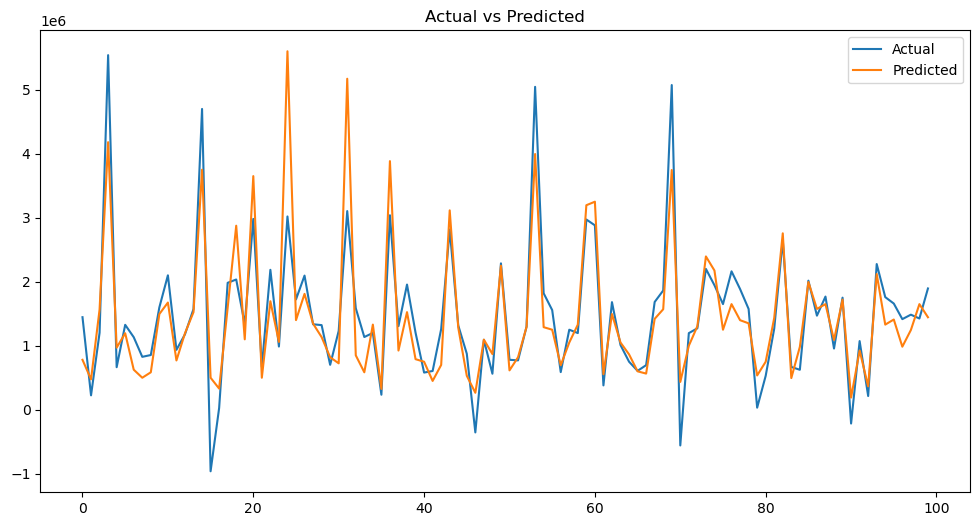

In [9]:
from sklearn.linear_model import Lasso

# 6. Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_predict_lasso = lasso.predict(X_test) 
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

ElasticNet Regression Metrics:
Mean Absolute Error (MAE):  350143.01796289085
Root Mean Squared Error (RMSE):  503185.01042340056
R-squared (R^2):  0.7394142601229757


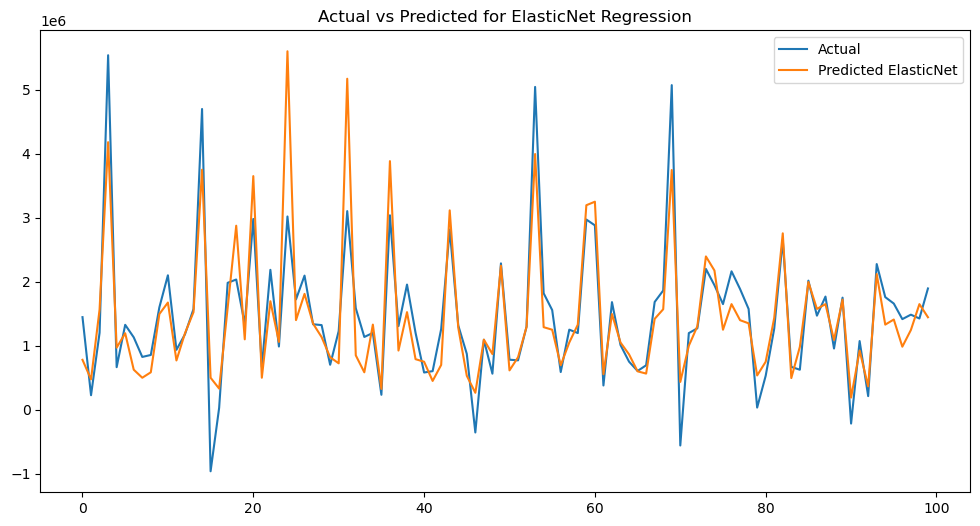

In [10]:
# 7. ElasticNet Regression
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)
y_predict_elasticnet = elasticnet.predict(X_test)
print('ElasticNet Regression Metrics:')
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_predict_elasticnet))
print('Root Mean Squared Error (RMSE): ', np.sqrt(mean_squared_error(y_test, y_predict_elasticnet)))
print('R-squared (R^2): ', r2_score(y_test, y_predict_elasticnet))
fig = plt.figure(figsize=(12, 6))
result_elasticnet = pd.DataFrame({'Predicted ElasticNet': y_predict_elasticnet, 'Actual': y_test})
result_elasticnet = result_elasticnet.reset_index()
result_elasticnet = result_elasticnet.drop(['index'], axis=1)
plt.plot(result_elasticnet[:100])
plt.legend(['Actual', 'Predicted ElasticNet'])
plt.title('Actual vs Predicted for ElasticNet Regression')
plt.show()